In [27]:
%load_ext autoreload
%autoreload 2

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [29]:
import cooltools
import cooler 

In [ ]:
data_dir='/pollard/home/shzhang/akita_variant_scoring/akdemir_collab/data/'
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

In [34]:
list_mcool=os.listdir(data_dir + 'mcool/')
list_mcool

['SMF-12-23_walk_9_MDM2_containing.fa.mcool',
 'SMF-12-23_walk_8_MDM2_containing.fa.mcool',
 'SMF-12-12_walk_3_KRAS_containing.fa.mcool',
 'SMF-12-23_walk_9_GLI1_containing.fa.mcool',
 'SMF-12-12_walk_4_KRAS_containing.fa.mcool',
 'SMF-12-12_walk_5_KRAS_containing.fa.mcool',
 'SMF-12-17_walk_7_MDM2_containing.fa.mcool',
 'SMF-12-23_walk_11_GLI1_containing.fa.mcool',
 'SMF-12-12_walk_4_GLI1_containing.fa.mcool',
 'SMF-12-17_walk_4_GLI1_containing.fa.mcool',
 'SMF-12-23_walk_11_MDM2_containing.fa.mcool',
 'SMF-12-17_walk_9_MDM2_containing.fa.mcool',
 'SMF-12-23_walk_10_MDM2_containing.fa.mcool',
 'SMF-12-17_walk_8_MDM2_containing.fa.mcool',
 'SMF-12-17_walk_5_GLI1_containing.fa.mcool',
 'SMF-12-17_walk_3_GLI1_containing.fa.mcool']

In [221]:
idx_plot=10
file_plot='mcool/'+list_mcool[idx_plot]

In [222]:
cooler.fileops.list_coolers(data_dir + file_plot)

['/resolutions/1000',
 '/resolutions/5000',
 '/resolutions/10000',
 '/resolutions/25000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000',
 '/resolutions/2500000']

In [223]:
test=pd.read_csv(data_dir+'new_fasta/walks.bed/' + 
                 list_mcool[idx_plot].replace('.fa.mcool', '.bed'), sep='\t', header=None)
print('total seq len: ', np.sum(test[2]-test[1]))
test.head()

total seq len:  922250


,0,1,2,3,4,5
0,chr12,67673892,67824002,-,38,-235
1,chr12,67646993,67673891,-,40,-234
2,chr12,67599670,67646992,-,38,-233
3,chr12,67589335,67599669,-,36,-232
4,chr12,68642606,68738454,+,36,241


In [224]:
clr = cooler.Cooler(f'{data_dir}/{file_plot}::resolutions/5000')

### to print chromosomes and binsize for this cooler
# for i in clr.chromnames:
#     print(f'{i} : {clr.extent(i)}')
#     chromstarts.append(clr.extent(i)[0])

In [225]:
all_bins=clr.bins()[:]
chr12=all_bins[all_bins.chrom=='12']
chr12

,chrom,start,end,KR,SCALE,VC,VC_SQRT
388759,12,0,5000,0.604977,0.604237,0.620702,0.769585
388760,12,5000,10000,0.511514,0.500080,0.519658,0.704163
388761,12,10000,15000,1.059016,1.058275,1.021272,0.987155
388762,12,15000,20000,0.876695,0.875859,0.833618,0.891863
388763,12,20000,25000,0.990190,0.989337,0.938271,0.946191
...,...,...,...,...,...,...,...
415410,12,133255000,133260000,NaN,NaN,0.000000,0.000000
415411,12,133260000,133265000,NaN,NaN,0.000000,0.000000
415412,12,133265000,133270000,NaN,NaN,0.000000,0.000000
415413,12,133270000,133275000,NaN,NaN,0.000000,0.000000


In [226]:
non_nan_bins=all_bins[all_bins['KR'].notnull()]
print('max KR: ', non_nan_bins['KR'].max())
non_nan_bins.head()

max KR:  4.818991993813203


,chrom,start,end,KR,SCALE,VC,VC_SQRT
388759,12,0,5000,0.604977,0.604237,0.620702,0.769585
388760,12,5000,10000,0.511514,0.500080,0.519658,0.704163
388761,12,10000,15000,1.059016,1.058275,1.021272,0.987155
388762,12,15000,20000,0.876695,0.875859,0.833618,0.891863
388763,12,20000,25000,0.990190,0.989337,0.938271,0.946191


In [227]:
pixels=clr.pixels()[:]
print('num pixels: ', len(pixels))
print('max raw count: ', pixels['count'].max())
pixels.head()

num pixels:  8359
max raw count:  1061


,bin1_id,bin2_id,count
0,388759,388761,8
1,388759,388762,5
2,388759,388763,5
3,388759,388764,3
4,388759,388765,3


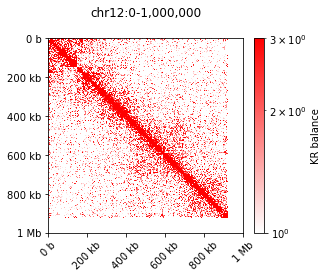

In [230]:
# to plot ticks in terms of megabases we use the EngFormatter
# https://matplotlib.org/gallery/api/engineering_formatter.html
### plot the corrected data in fall heatmap ###
import cooltools.lib.plotting
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
print(fruitpunch)
from matplotlib.colors import LogNorm



def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

f, ax = plt.subplots(
    figsize=(5,4), ncols=1)

start, end = 0, 1_000_000
region = ('12', start, end)
im = ax.matshow(
    clr.matrix(balance='KR').fetch(region),
    cmap=fruitpunch,
    #vmax=20,
    norm = LogNorm(vmin=1, vmax=3),
    extent=(start, end, end, start)
);

ax.set_title(f'chr12:{start:,}-{end:,}', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='KR balance');
format_ticks(ax)
plt.tight_layout()
